<a href="https://colab.research.google.com/github/B-hub-hue/Python.exam_polymer/blob/optical-signal-analysis-exam/Python_exam_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

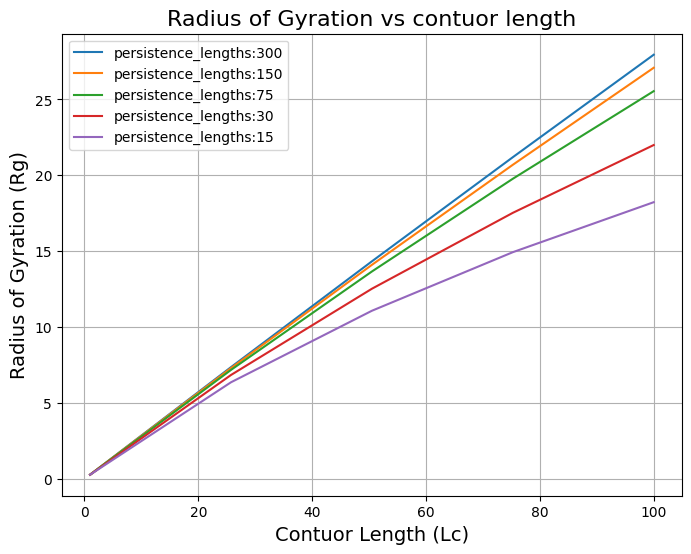

[0.2867654987890505, 6.373396199228566, 11.082927054289488, 14.939507572735586, 18.231508040127636]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#defing the parameters
N = 100 # Number of segments
L = 1
Lc = np.linspace(1, N, 5) # contour lengths

lp = [300, 150, 75, 30, 15] # persistence lengths

def radius_of_gyration(N, Lc, lp):
   B= lp/Lc

   return np.sqrt((Lc * lp/3)*(1-3*B*(1-2*B+2*(B**2)-2*(B**2)*np.exp(-1/B))))

# plotting the graph
plt.figure(figsize=(8, 6))

for lp in lp :
  Rg_values = [radius_of_gyration(N, Lc, lp) for Lc in Lc ]
  plt.plot(Lc, Rg_values, label=f'persistence_lengths:{lp}')

plt.xlabel('Contuor Length (Lc)', fontsize=14)
plt.ylabel('Radius of Gyration (Rg)', fontsize=14)
plt.title('Radius of Gyration vs contuor length', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
print(Rg_values)

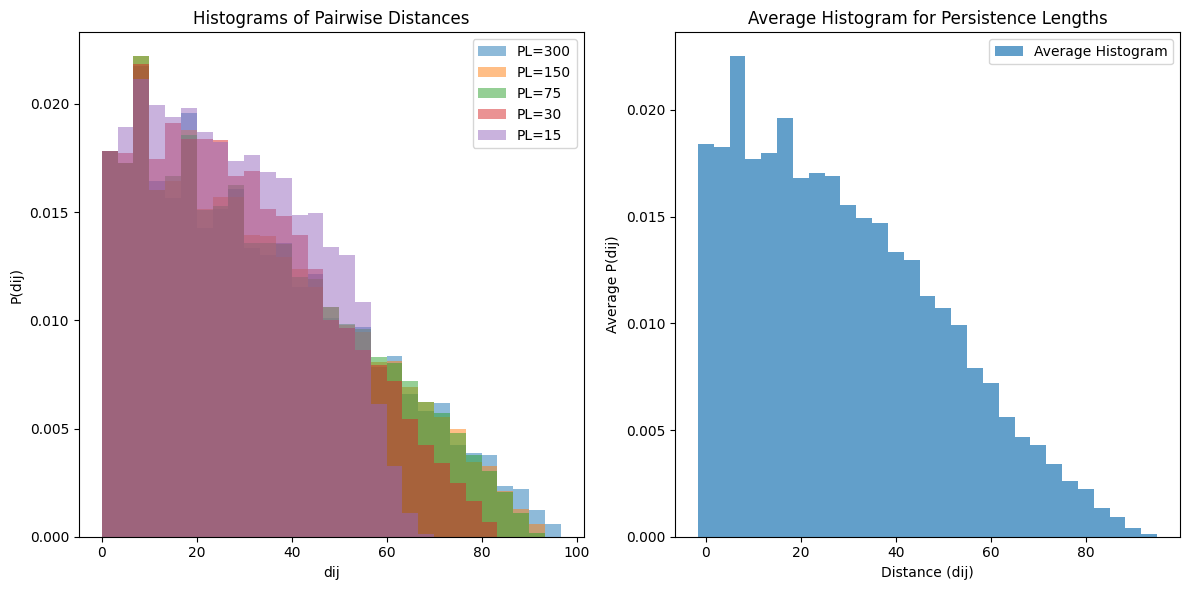

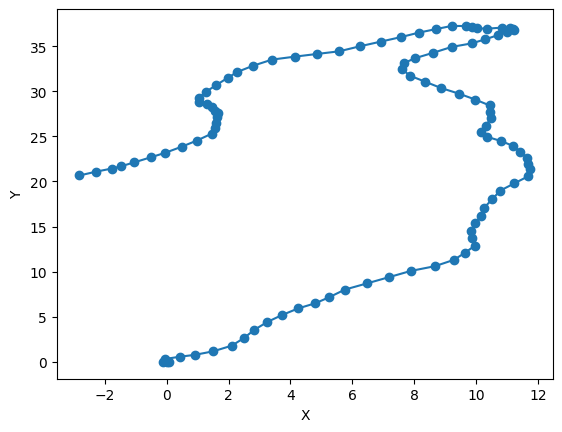

{300: [1.0, 1.9965974783867761, 2.9937852923353594, 3.9937669672917195, 4.9937301310022955, 5.993716369018258, 6.993662247644256, 7.992040894250208, 8.9909773026022, 9.989854282645684, 10.988461047073544, 11.987986393488045, 12.98531210786844, 13.97948337622841, 14.975743647568372, 15.973871563187728, 16.972456314435387, 17.971133334092702, 18.96979396270168, 19.968462564407968, 20.967239677756183, 21.963254669333168, 22.953681596135425, 23.943064314730854, 24.92349854575085, 25.906548908570983, 26.89411006090311, 27.884097969047193, 28.880010124277813, 29.874091774214225, 30.868345641765547, 31.848404366587886, 32.832591061024814, 33.82264431224923, 34.815869477207414, 35.80804052932593, 36.79015349479838, 37.77529905316331, 38.758866082280825, 39.7462026325315, 40.70436319405095, 41.66129609242785, 42.6181340970305, 43.575676331894556, 44.554012713802, 45.520567998708614, 46.487728462568306, 47.455991533256245, 48.420103166372435, 49.393773994941675, 50.37545087329914, 51.37379762969

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
# Define helper functions
delta_theta = 0.0102
segment_length = 1  # Set the desired equal segment length

def custom_gaussian_theta(delta_theta):
    """Sample from the custom Gaussian distribution for theta."""
    return np.random.normal(0, delta_theta)

def rodrigues_rotation(v, k, theta, phi):
    """Perform Rodrigues rotation."""
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    rotated_vector = (v * c_theta +
                      np.cross(k, v) * s_theta +
                      k * np.dot(k, v) * (1 - c_theta))
    # Normalize to the desired segment length
    return segment_length * rotated_vector / np.linalg.norm(rotated_vector)

def dij(positions, i, j):
   # """Compute the distance between two points."""
    return np.linalg.norm(positions[i] - positions[j])

# Parameters
num_segments = 100
num_trials = 1  # Number of trials to gather distances
persistence_lengths = [300, 150, 75, 30, 15]  # Array of persistence lengths

# Store distances for each persistence length
distances = {length: [] for length in persistence_lengths}

for _ in range(num_trials):
    for persistence_length in persistence_lengths:
        # Starting position and direction for each persistence length
        positions = [np.array([0, 0, 0])]  # Start at the origin
        direction = np.array([0, 0, 1])  # Initial direction

        for _ in range(1, num_segments):
            # Sample theta based on the selected persistence length
            theta = custom_gaussian_theta(1 / np.sqrt(persistence_length))  # Scale by persistence length
            phi = np.random.uniform(0, 2 * np.pi)  # Uniformly distributed phi
            axis_of_rotation = np.cross(np.random.random(size=3), direction) # Use direction instead of vectors[-1]

            # Apply Rodrigues' rotation
            new_direction = rodrigues_rotation(direction, axis_of_rotation, theta, phi)
            new_direction = new_direction / np.linalg.norm(new_direction)  # Normalize the direction vector
            direction = new_direction  # Update the current direction

            # Calculate the new position
            new_position = positions[-1] + segment_length * new_direction
            positions.append(new_position) # Append to the list 'positions'

        # Convert list of positions to NumPy array after the loop
        positions = np.array(positions)

        # Calculate pairwise distances and store
        for i in range(len(positions) - 1):
            for j in range(i + 1, len(positions)):
                distances[persistence_length].append(dij(positions, i, j))

# ... (rest of your code remains the same) ...

# Define a common set of bin edges for all histograms
common_bin_edges = np.linspace(0, max(max(distances[length]) for length in persistence_lengths), 30)

# Plot histograms for each persistence length
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
all_histograms = []

for i, length in enumerate(persistence_lengths):
    hist_values, _ = np.histogram(distances[length], bins=common_bin_edges, density=True)
    ax1.hist(distances[length], bins=common_bin_edges, alpha=0.5, density=True, label=f'PL={length}')
    all_histograms.append(hist_values)

ax1.set_xlabel('dij')
ax1.set_ylabel('P(dij)')
ax1.legend()
ax1.set_title('Histograms of Pairwise Distances')

# Convert list of histograms to numpy array for averaging
all_histograms = np.array(all_histograms)

# Calculate the average histogram
average_hist = np.mean(all_histograms, axis=0)
# Normalize the average histogram to ensure the total area is 1
average_hist /= np.trapz(average_hist, common_bin_edges[:-1])

# Plot average histogram on the second subplot (ax2)
ax2.bar(common_bin_edges[:-1], average_hist, width=np.diff(common_bin_edges), alpha=0.7, label='Average Histogram')
ax2.set_xlabel('Distance (dij)')
ax2.set_ylabel('Average P(dij)')
ax2.set_title('Average Histogram for Persistence Lengths')
ax2.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
plt.plot(positions[:, 0], positions[:, 1], 'o-', label='Polymer Chain')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(distances)



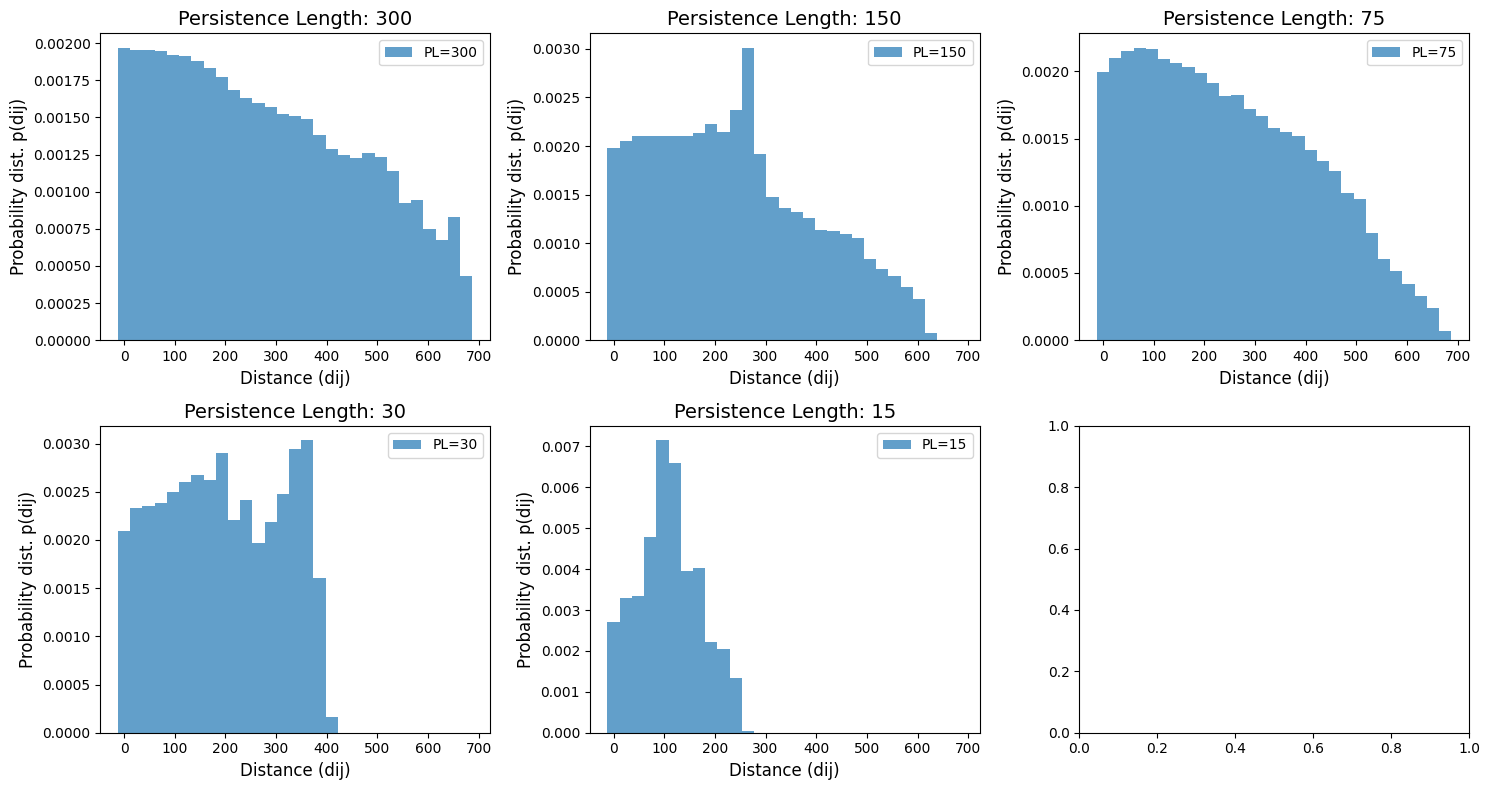

In [ ]:
# Calculating the number of rows and columns for the grid
num_rows = 2  # Adjust as needed
num_cols = 3  # Adjust as needed

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through persistence lengths and plot in subplots
for i, length in enumerate(persistence_lengths):
    if i < len(axes):  # Make sure we don't exceed the number of subplots
        ax = axes[i]  # Get the current subplot
        # Calculate the histogram using common bin edges
        hist_values, _ = np.histogram(distances[length], bins=common_bin_edges, density=True)

        # Plot the histogram using common bin edges
        ax.bar(common_bin_edges[:-1], hist_values, width=np.diff(common_bin_edges), alpha=0.7, label=f'PL={length}')

        ax.set_title(f'Persistence Length: {length}', fontsize=14)
        ax.set_xlabel('Distance (dij)', fontsize=12)
        ax.set_ylabel('Probability dist. p(dij)', fontsize=12)
        ax.legend()
    else:
        break  # Stop if we have more persistence lengths than subplots

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

Distances between consecutive particles: [1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0000000000000002, 0.9999999999999998, 1.0000000000000002, 0.9999999999999997, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002, 0.9999999999999994, 0.9999999999999998, 0.9999999999999996, 1.0000000000000007, 0.9999999999999999, 0.9999999999999992, 1.0000000000000007, 1.0, 0.9999999999999991, 1.0, 1.0000000000000007, 1.0, 1.0, 0.9999999999999998, 1.0000000000000002, 0.9999999999999999, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 0.9999999999999998, 0.9999999999999998, 1.0, 0.9999999999999999, 1.0000000000000002, 1.0000000000000004, 0.9999999999999998, 1.0, 0.9999999999999998, 1.0000000000000002, 1.0000000000000004, 1.0000000000000004, 1.0, 0.9999999999999999, 1.0000000000000002, 1.0000000000000004, 1.0, 1.0, 0.9

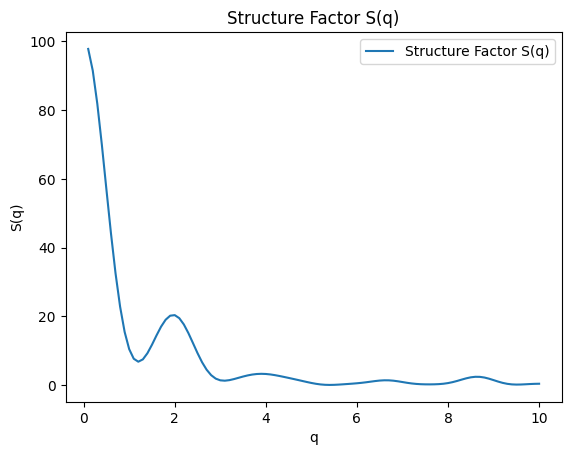

NameError: name 'ax' is not defined

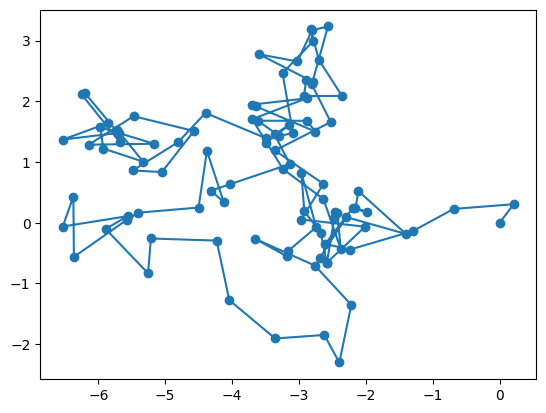

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Number of particles
N = 100
segment_length = 1.0  # Desired distance between consecutive particles
lp = 100  # Persistence length
# Generate positions for particles with equal spacing along a random walk
R = [np.array([0, 0, 0])]  # Start at origin

for _ in range(1, N):
    # Generate a random direction vector
    theta = np.random.uniform(0, np.pi)  # Polar angle
    phi = np.random.uniform(0, 2 * np.pi)  # Azimuthal angle
    direction = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    # Normalize the direction and scale by segment length
    next_position = R[-1] + segment_length * direction
    R.append(next_position)

R = np.array(R)  # Convert to numpy array

# Verify distances
distances = [np.linalg.norm(R[i] - R[i - 1]) for i in range(1, len(R))]
print("Distances between consecutive particles:", distances)

# Check if distances are equal
if all(np.isclose(d, segment_length, atol=1e-8) for d in distances):
    print("All segments have equal spacing.")
else:
    print("Segments are not equally spaced!")

# Wave vector
q_values = np.linspace(0.1, 10, 100)  # Magnitudes of q
S_q = []

for q in q_values:
    q_vector = np.array([q, 0, 0])  # Example: q along x-direction
    S_q_val = 0

    for j in range(N):
        for k in range(N):
            r_diff = R[j] - R[k]
            S_q_val += np.exp(-1j * np.dot(q_vector, r_diff))

    S_q.append(S_q_val.real / N)  # Take the real part and normalize

# Plot the structure factor
plt.plot(q_values, S_q, label="Structure Factor S(q)")
plt.xlabel("q")
plt.ylabel("S(q)")
plt.title("Structure Factor S(q)")
plt.legend()
plt.show()

# Plot the particle positions in 3D
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
plt.plot(R[:, 0], R[:, 1], 'o-', label='Particle Chain')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('Z')
plt.title("Particle Chain with Equal Spacing")
plt.legend()
plt.show()


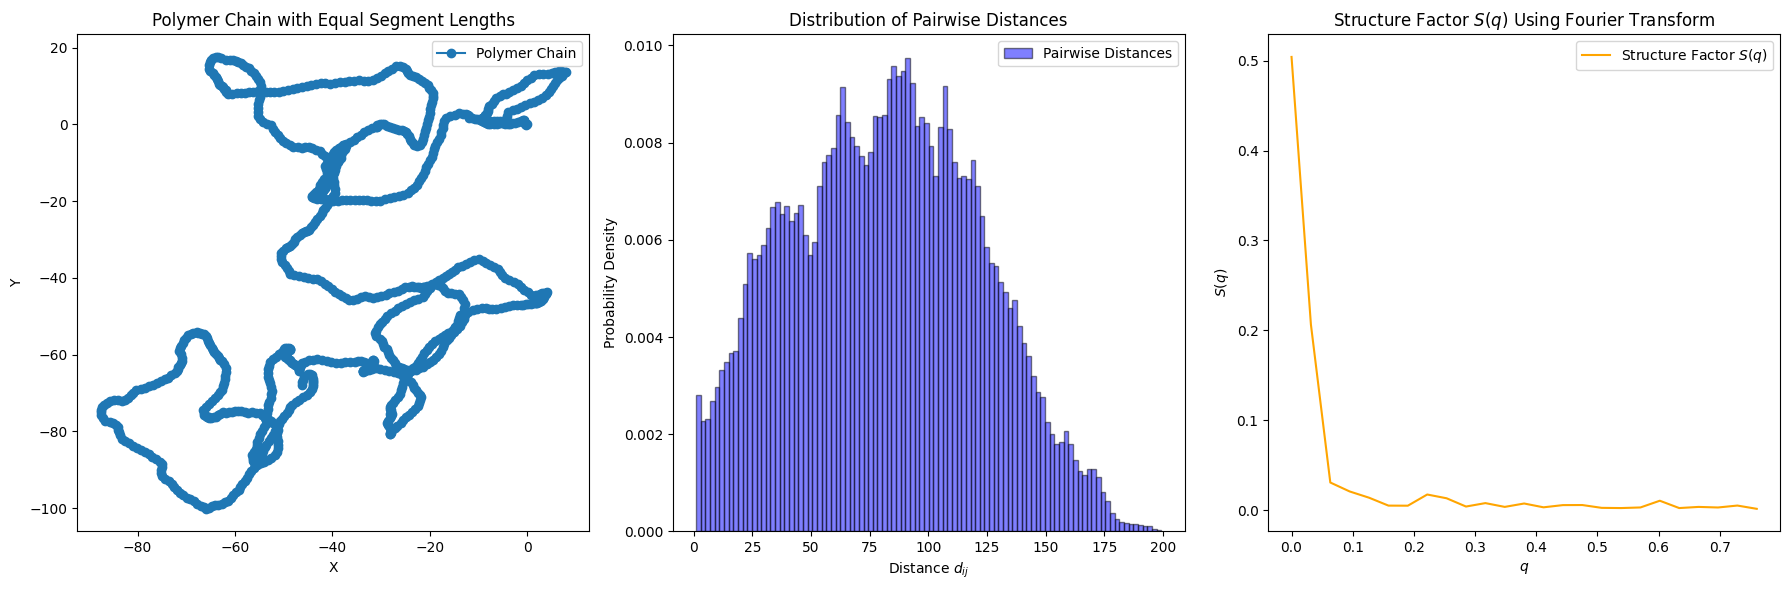

In [35]:
# Plot in a single row with three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the polymer chain
axes[0].plot(positions[:, 0], positions[:, 1], 'o-', label="Polymer Chain")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('Polymer Chain with Equal Segment Lengths')
axes[0].legend()

# Plot histogram of pairwise distances
axes[1].bar(bin_centers, hist_values, width=np.diff(bin_edges)[0], alpha=0.5, color='blue', edgecolor='black', label='Pairwise Distances')
axes[1].set_xlabel('Distance $d_{ij}$')
axes[1].set_ylabel('Probability Density')
axes[1].set_title('Distribution of Pairwise Distances')
axes[1].legend()

# Plot structure factor S(q)
axes[2].plot(q_values[:len(S_q)//2], S_q[:len(S_q)//2], label="Structure Factor $S(q)$", color='orange')
axes[2].set_xlabel('$q$')
axes[2].set_ylabel('$S(q)$')
axes[2].set_title('Structure Factor $S(q)$ Using Fourier Transform')
axes[2].legend()

plt.tight_layout()
plt.show()

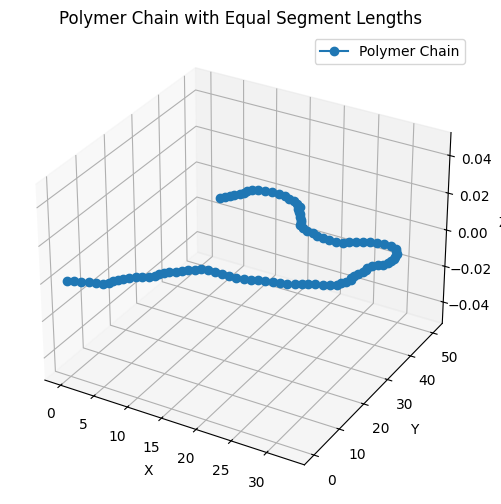

Pairwise distances between all segments:
[1.0, 1.9999994891151656, 2.9997109868791423, 3.998996424948231, 4.980697221727491, 5.844175180209662, 6.532506347012733, 7.485295865072879, 8.395562628445427, 9.365641858014191, 10.365115332171802, 11.361070027531746, 12.3462368278474, 13.345611373340136, 14.205380209105291, 15.139989754733467, 16.118657825685514, 17.107855591867587, 18.104549595474296, 19.0988629360136, 20.07396196865726, 21.07119414124173, 21.989910663414463, 22.57394366524091, 23.377578211281683, 24.156070622495733, 24.830160434377436, 25.694566604417435, 26.67731952444297, 27.67513316075526, 28.61075812148686, 29.518056306525036, 30.46265536279814, 31.453558253373966, 32.451154666674555, 33.450448395511444, 34.44300663607876, 35.44082846529305, 36.419845722670566, 37.41943918694658, 38.419132523600176, 39.1828045695165, 40.09449305701021, 41.00712405055588, 41.46252595925857, 42.20386983128483, 43.04118326138164, 43.92966039707726, 44.6917790376873, 45.29821709058761, 46.25

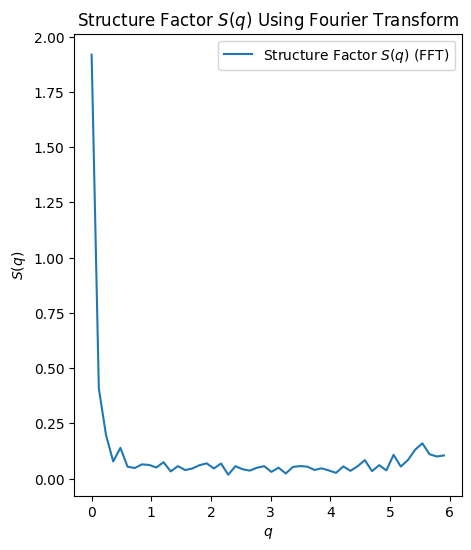

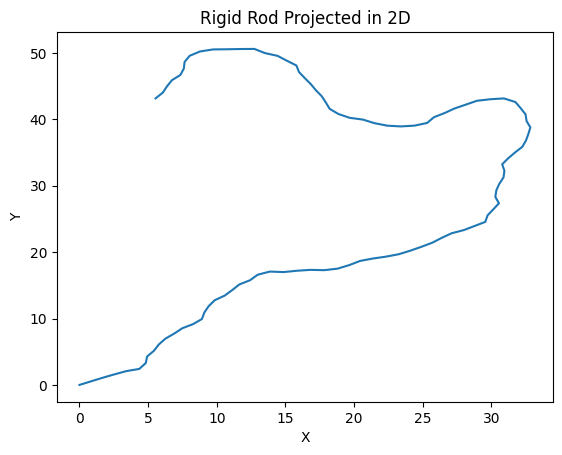

Rod Direction Vector: [0.12737767 0.99185429 0.        ]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

N = 100  # Number of segments
persistence_length = 10  # Controls the stiffness of the chain (large = rigid rod)
delta_theta = 0.0 if persistence_length > 500 else 0.102  # Reduce deviations for large PL
segment_length = 1  # Fixed length for each segment

def rodrigues_rotation(v, k, theta, phi):
    """Perform Rodrigues' rotation."""
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

# Starting position
positions = [np.array([0, 0, 0])]  # Start at the origin
direction = np.array([1, 1, 0])  # Initial direction

# Generate the chain with equal segment lengths
for _ in range(1, N):
    if persistence_length > 500:
        # Enforce a straight chain for large persistence lengths
        new_direction = direction
    else:
        # Sample rotation angles for flexible chains
        theta = np.random.normal(0, 1 / np.sqrt(persistence_length))
        phi = np.random.uniform(0, 2 * np.pi)

        # Use a fixed orthogonal axis for simplicity
        axis_of_rotation = np.array([1, 1, 0]) if direction[0] == 0 else np.cross([0, 1, 0], direction)

        # Apply Rodrigues' rotation
        new_direction = rodrigues_rotation(direction, axis_of_rotation, theta, phi)
        new_direction = new_direction / np.linalg.norm(new_direction)  # Normalize

    # Update the current direction and position
    direction = new_direction
    new_position = positions[-1] + segment_length * new_direction
    positions.append(new_position)

# Convert list of positions to NumPy array
positions = np.array(positions)

# Plot the chain in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', label="Polymer Chain")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Polymer Chain with Equal Segment Lengths')
ax.legend()
plt.show()
# Compute pairwise distances
distances = []
for i in range(N):
    for j in range(i + 1, N):
        distances.append(np.linalg.norm(positions[i] - positions[j]))

# Create a histogram for pairwise distances
num_bins = 100
hist_values, bin_edges = np.histogram(distances, bins=num_bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Compute bin centers

# Perform FFT on the histogram
bin_spacing = bin_centers[1] - bin_centers[0]  # Uniform bin spacing
q_values = fftfreq(num_bins, d=bin_spacing) * 2 * np.pi  # Convert to angular wavenumbers
S_q_complex = fft(hist_values)  # FFT of the histogram
S_q = np.abs(S_q_complex)  # Magnitude of the FFT represents S(q)

# Filter out negative q-values
positive_indices = q_values >= 0
q_values = q_values[positive_indices]
S_q = S_q[positive_indices]
# Print pairwise distances for verification
print("Pairwise distances between all segments:")
print(distances)
# Plot the structure factor
plt.figure(figsize=(5, 6))
plt.plot(q_values, S_q, label="Structure Factor $S(q)$ (FFT)")
plt.xlabel("$q$")
plt.ylabel("$S(q)$")
plt.title("Structure Factor $S(q)$ Using Fourier Transform")
plt.legend()

plt.show()
# Project along Z-axis to see the rigid rod clearly
plt.plot(positions[:, 0], positions[:, 1], '-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rigid Rod Projected in 2D')
plt.show()
direction = positions[-1] - positions[0]
print("Rod Direction Vector:", direction / np.linalg.norm(direction))


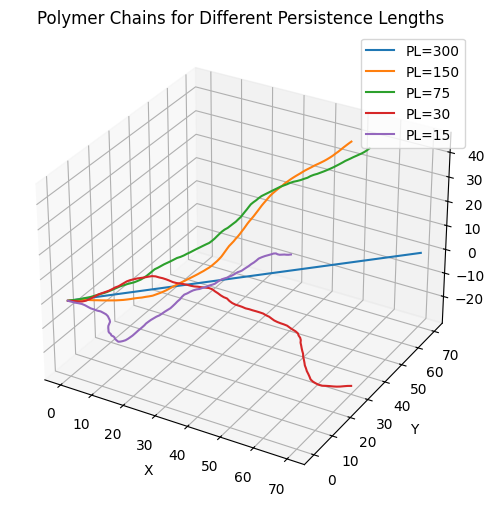

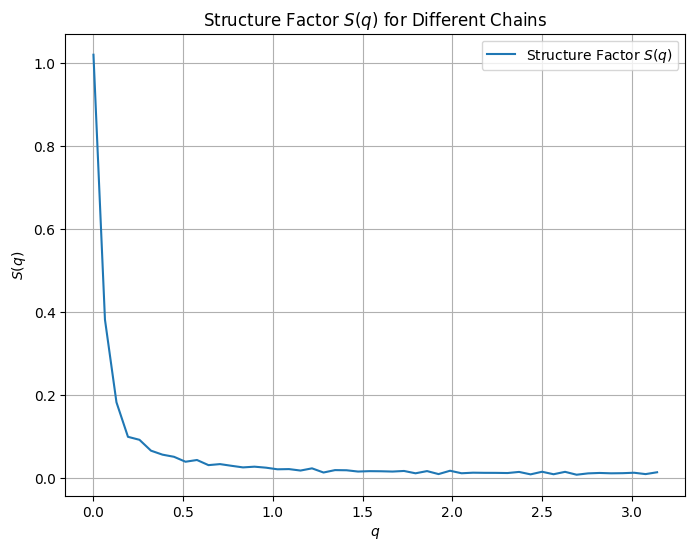

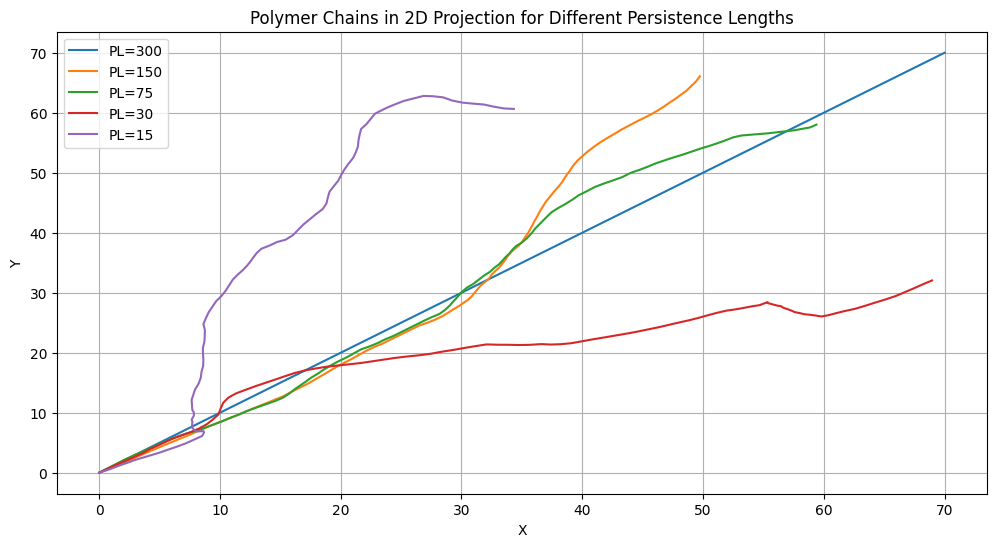

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D

# Parameters
delta_theta = 0.102
segment_length = 1
num_segments = 100
persistence_lengths = [300, 150, 75, 30, 15]  # Array of persistence lengths

def rodrigues_rotation(v, k, theta):
    """Perform Rodrigues rotation."""
    k = k / np.linalg.norm(k)  # Normalize axis
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    rotated_vector = (v * c_theta +
                      np.cross(k, v) * s_theta +
                      k * np.dot(k, v) * (1 - c_theta))
    return rotated_vector

# Simulation
positions_dict = {}
for persistence_length in persistence_lengths:
    positions = [np.array([0, 0, 0])]  # Start at the origin
    direction = np.array([1, 1, 0])  # Initial direction along Z-axis

    for _ in range(1, num_segments):
        if persistence_length > 200:
            theta = 0  # No angular deviation for rigid rod
        else:
            theta = np.random.normal(0, 1 / np.sqrt(persistence_length))
        phi = np.random.uniform(0, 2 * np.pi)

        # Random rotation axis perpendicular to direction
        random_vector = np.random.random(3)
        axis_of_rotation = np.cross(random_vector, direction)
        if np.linalg.norm(axis_of_rotation) == 0:
            axis_of_rotation = np.array([1, 1, 0])  # Default axis if undefined

        # Apply Rodrigues' rotation
        new_direction = rodrigues_rotation(direction, axis_of_rotation, theta)
        new_direction = new_direction / np.linalg.norm(new_direction)  # Normalize
        direction = new_direction  # Update direction

        # Compute new position
        new_position = positions[-1] + segment_length * direction
        positions.append(new_position)

    positions_dict[persistence_length] = np.array(positions)

# 3D Visualization
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

for length, pos in positions_dict.items():
    ax.plot(pos[:, 0], pos[:, 1], pos[:, 2], label=f'PL={length}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Polymer Chains for Different Persistence Lengths')
ax.legend()
plt.show()

# Structure Factor Analysis
distances = []
for length, pos in positions_dict.items():
    for i in range(len(pos) - 1):
        for j in range(i + 1, len(pos)):
            distances.append(np.linalg.norm(pos[i] - pos[j]))

# Histogram and Structure Factor
num_bins = 100
hist_values, bin_edges = np.histogram(distances, bins=num_bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Compute bin centers

bin_spacing = bin_centers[1] - bin_centers[0]
q_values = fftfreq(num_bins, d=bin_spacing) * 2 * np.pi
S_q_complex = fft(hist_values)
S_q = np.abs(S_q_complex)

positive_indices = q_values >= 0
q_values = q_values[positive_indices]
S_q = S_q[positive_indices]

plt.figure(figsize=(8, 6))
plt.plot(q_values, S_q, label="Structure Factor $S(q)$")
plt.xlabel("$q$")
plt.ylabel("$S(q)$")
plt.title("Structure Factor $S(q)$ for Different Chains")
plt.legend()
plt.grid()
plt.show()
# its 2D form
# 2D Visualization
plt.figure(figsize=(12, 6))

for length, pos in positions_dict.items():
    plt.plot(pos[:, 0], pos[:, 1], label=f'PL={length}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polymer Chains in 2D Projection for Different Persistence Lengths')
plt.legend()
plt.grid()
plt.show()


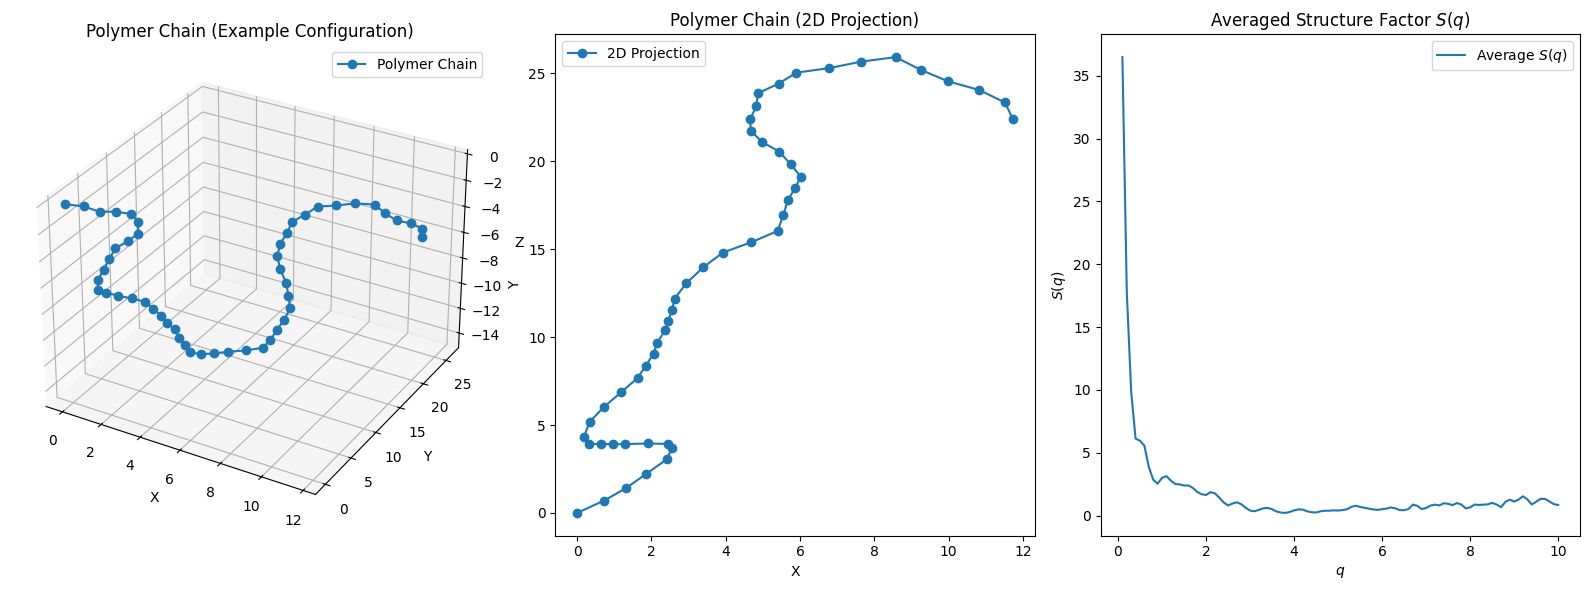

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 50  # Number of segments
large_persistence_length = 10  # Large persistence length for rigid-rod behavior
segment_length = 1  # Fixed length for each segment
num_configurations = 10  # Number of configurations for averaging
q_values = np.linspace(0.1, 10, 100)  # Range of q-values

def rodrigues_rotation(v, k, theta, phi):
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

def generate_chain(N, large_persistence_length):
    """Generate a single polymer chain configuration."""
    positions = [np.array([0, 0, 0])]  # Start at the origin
    direction = np.array([1, 1, 0])  # Initial direction

    for _ in range(1, N):
        if large_persistence_length > 500:
            # Rigid rod behavior
            theta = 0
            phi = 0
            new_direction = direction
        else:
            # Flexible chain behavior
            theta = np.random.normal(0, 1 / np.sqrt(large_persistence_length))
            phi = np.random.uniform(0, 2 * np.pi)
            random_vector = np.random.random(3)
            axis_of_rotation = np.cross(random_vector, direction)
            if np.linalg.norm(axis_of_rotation) == 0:
              axis_of_rotation = np.array([1, 1, 0])
            new_direction = rodrigues_rotation(direction, axis_of_rotation, theta, phi)
            new_direction = new_direction / np.linalg.norm(new_direction)

        # Update direction and position
        direction = new_direction
        new_position = positions[-1] + segment_length * new_direction
        positions.append(new_position)

    return np.array(positions)

# Compute S(q) for multiple configurations
all_S_q = []

for _ in range(num_configurations):
    # Generate a new chain configuration
    positions = generate_chain(N, large_persistence_length)

    # Compute S(q) for this configuration
    S_q = []
    for q in q_values:
        q_vector = np.array([q, 0, 0])  # Example: q along x-direction
        S_q_val = 0

        for j in range(N):
            for k in range(N):
                r_diff = positions[j] - positions[k]
                S_q_val += np.exp(-1j * np.dot(q_vector, r_diff))

        S_q.append(S_q_val.real / N)  # Normalize by the number of segments

    all_S_q.append(S_q)

# Average S(q) across configurations
average_S_q = np.mean(all_S_q, axis=0)

# Plot results
plt.figure(figsize=(16, 6))

# Subplot 1: Example Polymer Chain
ax = plt.subplot(1, 3, 1, projection='3d')
positions = generate_chain(N, large_persistence_length)
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', label='Polymer Chain')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Polymer Chain (Example Configuration)')
ax.legend()

# Subplot 2: 2D Projection of Example Chain
plt.subplot(1, 3, 2)
plt.plot(positions[:, 0], positions[:, 1], 'o-', label='2D Projection')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polymer Chain (2D Projection)')
plt.legend()

# Subplot 3: Averaged S(q)
plt.subplot(1, 3, 3)
plt.plot(q_values, average_S_q, label="Average $S(q)$")
plt.xlabel("$q$")
plt.ylabel("$S(q)$")
plt.title("Averaged Structure Factor $S(q)$")
plt.legend()

plt.tight_layout()
plt.show()
